In [1]:
# -*- coding:utf-8 -*-
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

plt.rc('figure',figsize=(9,7))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
excelfile = pd.ExcelFile('pic.xlsx')
# 窃漏电用户的分布情况数据
usertype = excelfile.parse('usertype',encoding='utf-8')
# 正常用户用电周期性分析
data = excelfile.parse('Normal',encoding='utf-8')
# 非正常用户用电周期性分析
undata = excelfile.parse('Unnormal',encoding='utf-8')

usertype.set_index('types', inplace= True )

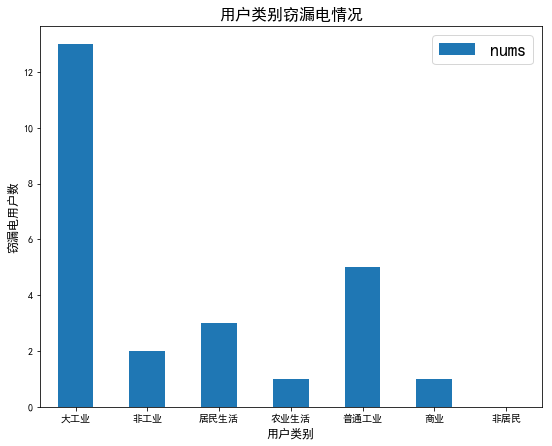

In [3]:
myfont = mpl.font_manager.FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=18)  #微软雅黑字体
# 使用plot画图
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname=r'C:\Windos\Fonts\simhei.ttf', size=18)
fig = plt.figure()
usertype.plot(kind='bar')
plt.xlabel(u'用户类别',fontsize=12,fontproperties=myfont)
plt.ylabel(u'窃漏电用户数',fontsize=12,fontproperties=myfont)
plt.title(u'用户类别窃漏电情况',fontsize=16,fontproperties=myfont)
plt.xticks(rotation=0) # 将坐标进行旋转
plt.legend(loc='upper right',prop=myfont)
plt.savefig('usertypes.jpg')
plt.show()

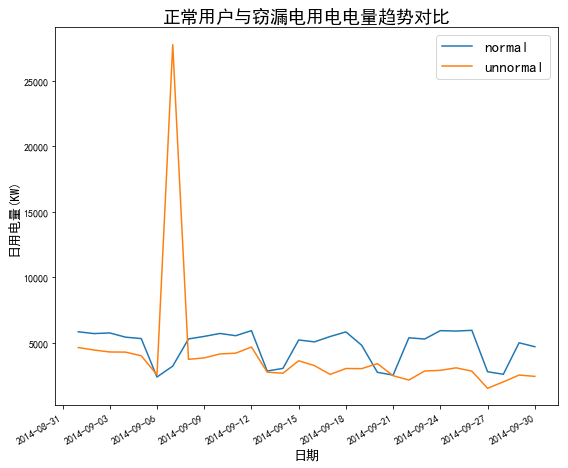

In [4]:
myfont1 = mpl.font_manager.FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size = 15)  #微软雅黑字体

# 使用面向对象方法画图

fig  = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title(u"正常用户与窃漏电用电电量趋势对比", fontsize=18, fontproperties=myfont1)
# ax.set(xlabel=u'日期',ylabel=u'日用电量(KW)')
ax.set_xlabel(u'日期',fontsize=13, fontproperties=myfont1)
ax.set_ylabel(u'日用电量(KW)',fontsize=13, fontproperties=myfont1)

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=3)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.subplots_adjust(bottom=0.13,top=0.95)
ax.plot(data[u'日期'],data[u'日用电量(KW)'])
ax.plot(undata[u'日期'],undata[u'日用电量(KW)'])
ax.legend(['normal','unnormal'],loc='best',prop=myfont1)
fig.autofmt_xdate() #自动根据标签长度进行旋转

'''for label in ax.xaxis.get_ticklabels():   #此语句完成功能同上
       label.set_rotation(45)
'''

plt.savefig('2.jpg')
plt.show()